In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3443.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1942.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.375.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3259.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.790.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.704.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3593.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3287.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.83.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1494.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.222.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2680.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3490.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.901.jpg
/kaggle/input/cat-and-dog/t

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2024-03-28 14:34:42.371653: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 14:34:42.371782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 14:34:42.515905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "../input/cat-and-dog/training_set/training_set/",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 8005 images belonging to 2 classes.


In [4]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/kaggle/input/cat-and-dog/test_set (1)/test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 2023 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [6]:
from tensorflow.keras.regularizers import l2

In [7]:
import tensorflow as tf

In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [14]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,545 (1.04 MB)

 Trainable params: 272,545 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [17]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 214ms/step - accuracy: 0.5193 - loss: 0.9862 - val_accuracy: 0.6826 - val_loss: 0.7411
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 128ms/step - accuracy: 0.6427 - loss: 0.7713 - val_accuracy: 0.7079 - val_loss: 0.7160
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - accuracy: 0.6868 - loss: 0.6781 - val_accuracy: 0.7187 - val_loss: 0.6649
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 132ms/step - accuracy: 0.6982 - loss: 0.6405 - val_accuracy: 0.7316 - val_loss: 0.6214
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.7184 - loss: 0.6009 - val_accuracy: 0.7430 - val_loss: 0.6438
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.7387 - loss: 0.5772 - val_accuracy: 0.7588 - val_loss: 0.6200
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.7229 - loss: 0.5950 - val_accuracy: 0.7553 - val_loss: 0.6500
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.7449 - loss: 0.5543 - val

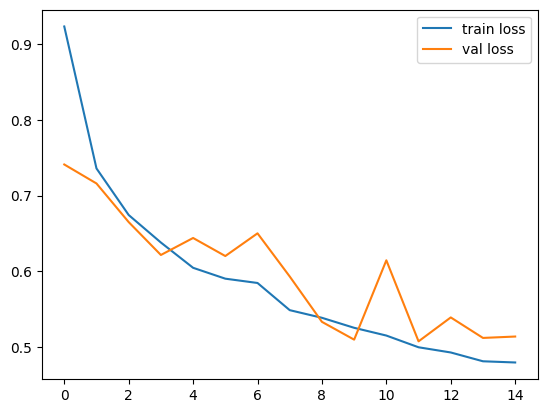

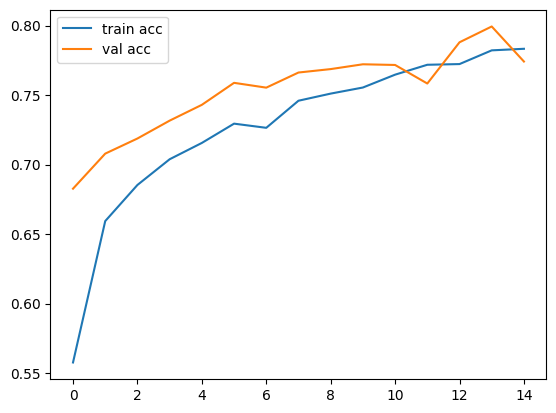

In [18]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show() 

In [19]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

In [20]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('../input/cat-and-dog/training_set/training_set/dogs/dog.1023.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [21]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
